# Data Analysis

I'll be using `seaborn` and `matplotlib` for the plots.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../1 - First Week/clean_data.csv')
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


<AxesSubplot:xlabel='Churn', ylabel='count'>

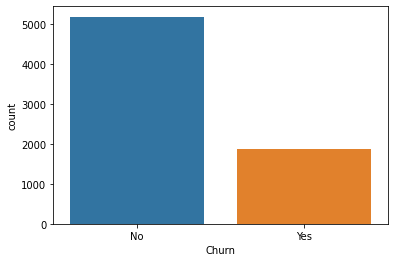

In [3]:
sns.countplot(x="Churn", data=data)

I'm creating a variable `columns` with the names for the columns with 
discrete data.

In [4]:
columns = [
            'gender',
            'SeniorCitizen',
            'Partner',
            'Dependents',
            'PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'Contract',
            'PaperlessBilling',
            'PaymentMethod'       
]

There are 16 elements in the `columns` variable, but I choose to use a grid 3x6 because it makes it easier to read the graphs.

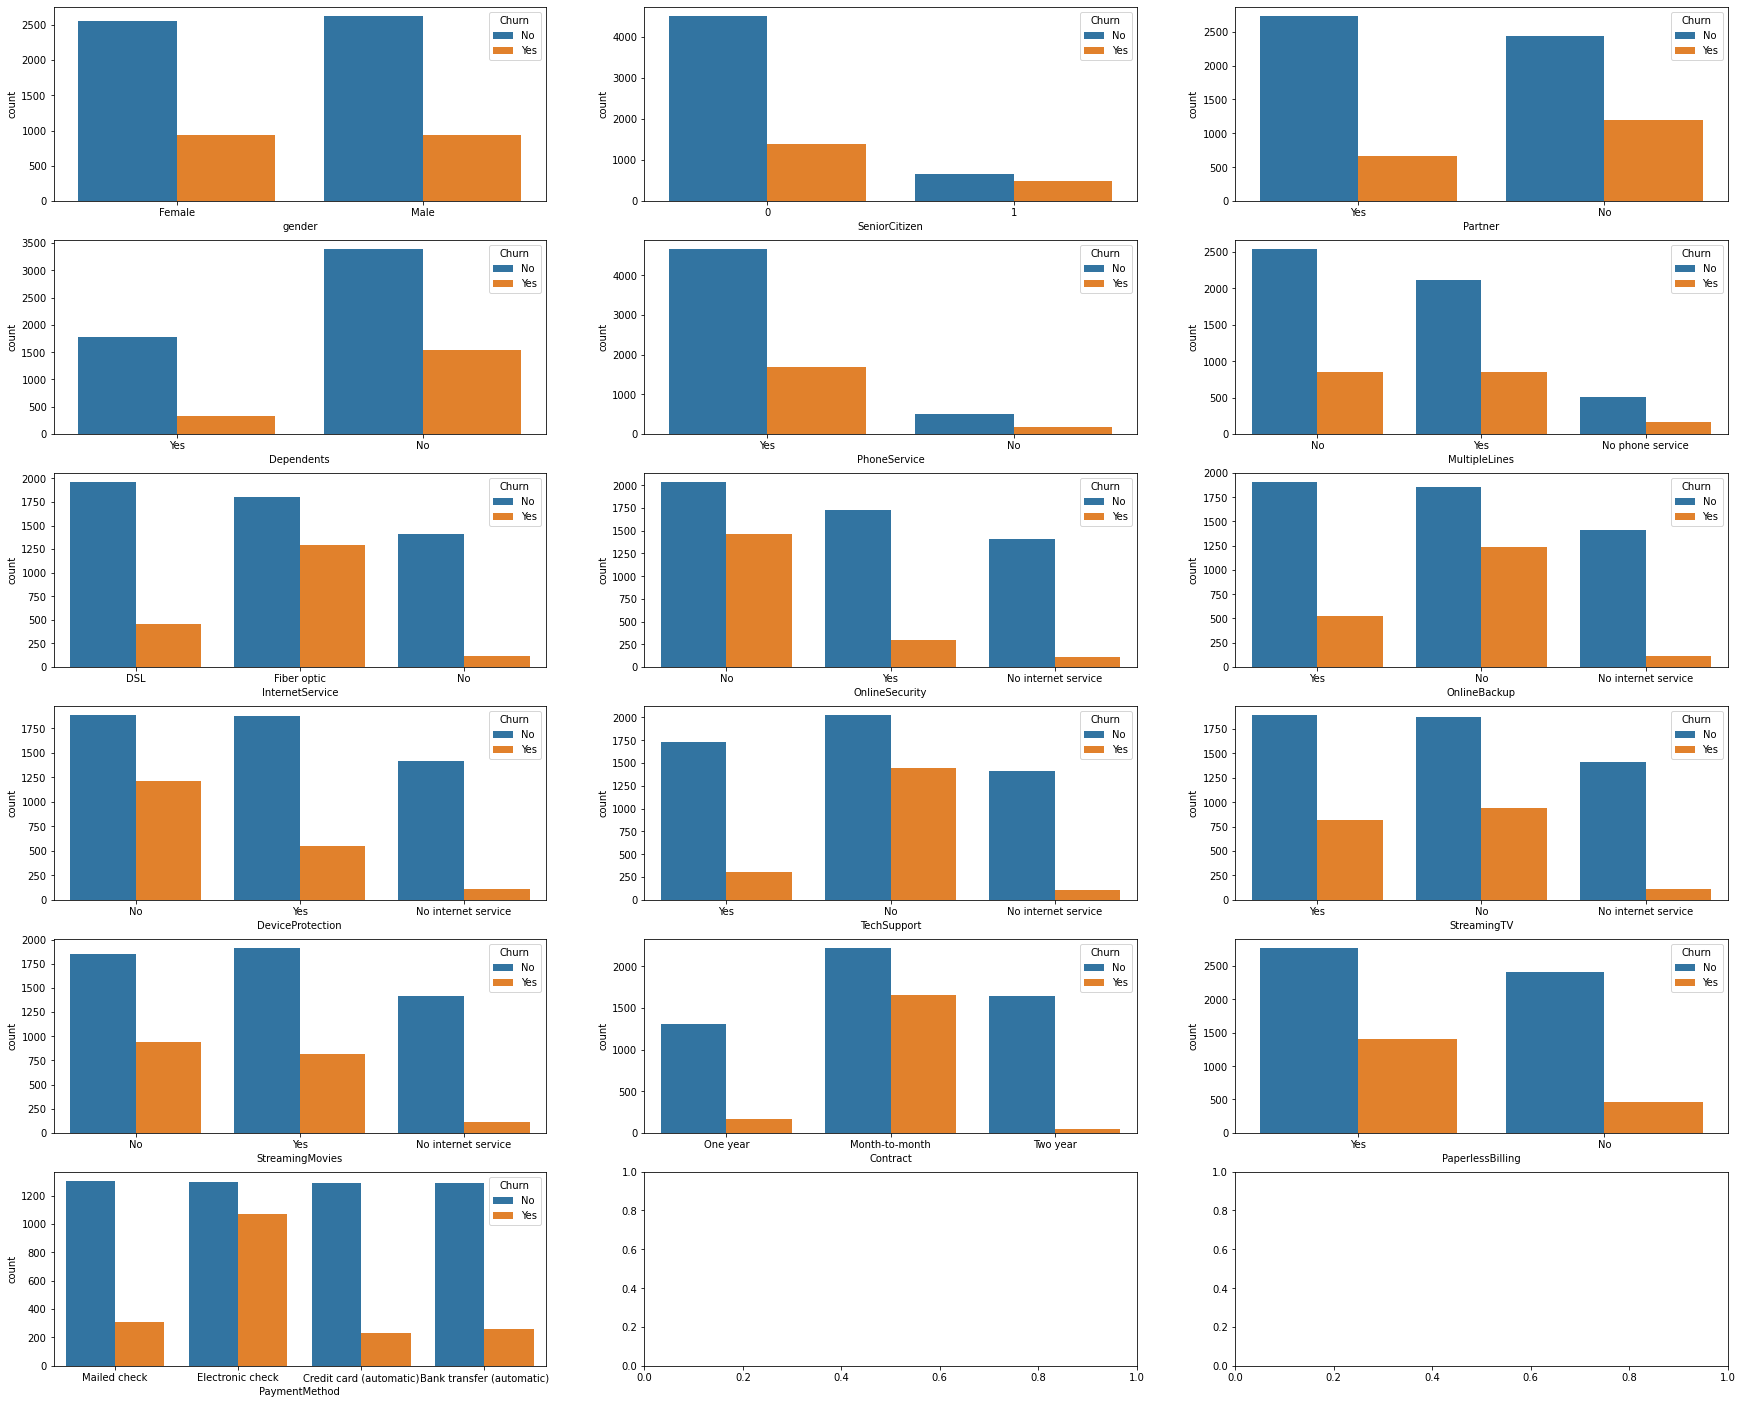

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=6, figsize=[30,25])
axs = axs.flatten()
i=0
for column in columns:
  sns.countplot(x=column, hue='Churn', data=data, ax=axs[i])
  i = i + 1

Looking at the plots, we can see that the payment method, contract, tech support, online backup, and internet service, seem to be defining factors in whether or not the client leaves the company.

Notice `TechSupport`, the clients that left the company didn't sign it. So they had a long waiting time when looking for assistance, which made the customers more likely to leave the company.

Using `Electronic check` as a payment method is prevalent among customers that leave Alura Voz. As well as a monthly contract.

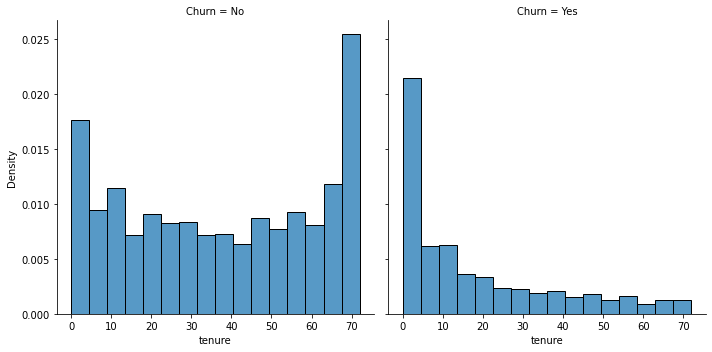

In [6]:
sns.displot(data, x='tenure', col='Churn', stat="density")

The likelihood for a client to drop the company is higher in the first month, this probability drops by more than half after five months, and continues to drop slowly afterward.

In [7]:
print("Average tenure for clients that didn't churn: {:.2f}\nAverage tenure for clients that did churn: {:.2f}".format(data.tenure[data.Churn == 'No'].mean(), data.tenure[data.Churn == 'Yes'].mean()))

Average tenure for clients that didn't churn: 37.57
Average tenure for clients that did churn: 17.98


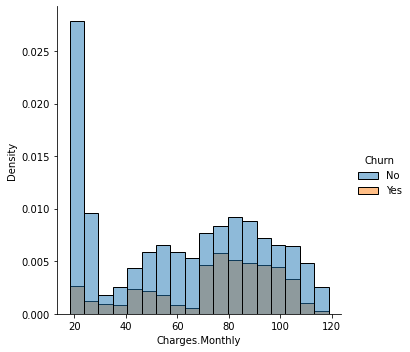

In [8]:
sns.displot(data, x='Charges.Monthly', hue='Churn', stat="density")

In [9]:
print("Average monthly charges for clients that didn't churn: {:.2f}\nAverage monthly charges for clients that did churn: {:.2f}".format(data['Charges.Monthly'][data.Churn == 'No'].mean(), data['Charges.Monthly'][data.Churn == 'Yes'].mean()))

Average monthly charges for clients that didn't churn: 61.27
Average monthly charges for clients that did churn: 74.44


The clients that were paying the highest monthly payments were more likely to churn. Maybe it's due to their preferred monthly contract.

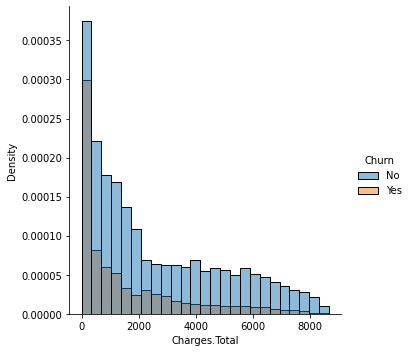

In [10]:
sns.displot(data, x='Charges.Total', hue='Churn', stat="density")

# Survival Analysis

In [11]:
%matplotlib inline
from sksurv.nonparametric import kaplan_meier_estimator

When we look at our dataset like this is easy to see that it fits a survival dataset. Just look at the `tenure` as the number of months a given customer "survived", and the `Churn` is indicating whether or not a customer survived.

In [12]:
data[['customerID', 'Churn', 'tenure']]

,customerID,Churn,tenure
0,0002-ORFBO,No,9
1,0003-MKNFE,No,9
2,0004-TLHLJ,Yes,4
3,0011-IGKFF,Yes,13
4,0013-EXCHZ,Yes,3
...,...,...,...
7038,9987-LUTYD,No,13
7039,9992-RRAMN,Yes,22
7040,9992-UJOEL,No,2
7041,9993-LHIEB,No,67


We need to change the `Yes` and `No` to `True` and `False`.

In [13]:
data.Churn.replace({'No': False, 'Yes': True}, inplace=True)

The Kaplan Meier Estimator is the survival function $S(t)$, it returns the probability of survival beyond time $t$ and is defined as:
\begin{align}
\hat S(t) = \frac{\text{number of patients surviving beyond t}}{\text{total number of patients}}
\end{align}
You can read more about it [here](https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html).

Text(0.5, 0, 'tenure')

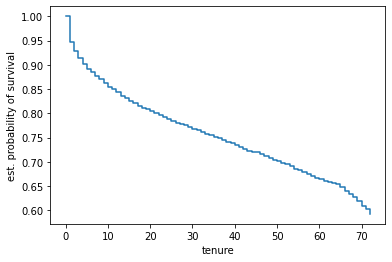

In [14]:
time, survival_prob = kaplan_meier_estimator(data["Churn"], data["tenure"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival")
plt.xlabel("tenure")

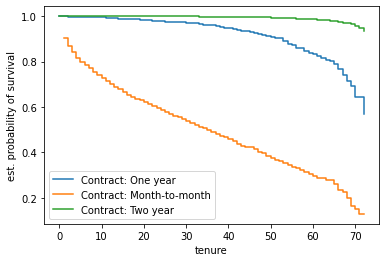

In [15]:
for contract in data.Contract.unique():
    mask_contract = data['Contract'] == contract
    time_contract, survival_prob_contract = kaplan_meier_estimator(
        data['Churn'][mask_contract],
        data['tenure'][mask_contract])

    plt.step(time_contract, survival_prob_contract, where="post",
             label="Contract: %s" % contract)

plt.ylabel("est. probability of survival")
plt.xlabel("tenure")
plt.legend(loc="best")

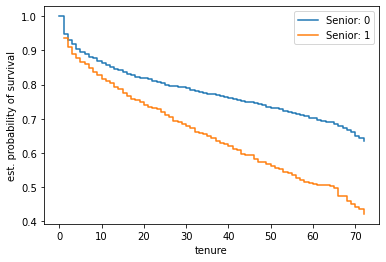

In [16]:
for senior in data.SeniorCitizen.unique():
    mask_senior = data['SeniorCitizen'] == senior
    time_senior, survival_prob_senior = kaplan_meier_estimator(
        data['Churn'][mask_senior],
        data['tenure'][mask_senior])

    plt.step(time_senior, survival_prob_senior, where="post",
             label="Senior: %s" % senior)

plt.ylabel("est. probability of survival")
plt.xlabel("tenure")
plt.legend(loc="best")

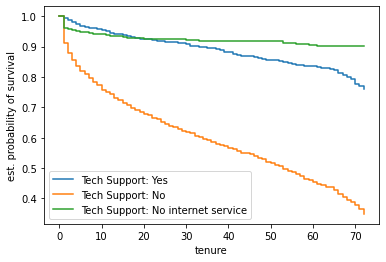

In [17]:
for tech in data.TechSupport.unique():
    mask_tech = data['TechSupport'] == tech
    time_tech, survival_prob_tech = kaplan_meier_estimator(
        data['Churn'][mask_tech],
        data['tenure'][mask_tech])

    plt.step(time_tech, survival_prob_tech, where="post",
             label="Tech Support: %s" % tech)

plt.ylabel("est. probability of survival")
plt.xlabel("tenure")
plt.legend(loc="best")

## The Churn Profile

Looking at the first plots, before the survival analysis, I got to the conclusion that:

- New clients are more likely to churn than old clients.

- Customers that use fewer services and products tend to leave the company. Also, when they aren't tied down to a longer contract they seem to be more likely to quit.

- Regarding the payment method, clients that churn have a **strong** preference for electronic checks and usually are spending 13.17 monetary units than the average client that didn't leave.

I only plotted the estimated Kaplan Meier probability of survival for the three variables that got my attention, `Contract`, `SeniorCitizen`, and `TechSupport`. In the contract and tech support is clear the difference between the survival rates throughout the tenure. But in the senior feature, this difference starts to become clear after 10 months.

I think it's clear that a survival model would fit perfectly our dataset, so in the next week, as part of the challenge, I'll implement a couple of survival models.

Because I changed the data, I'll be saving it to use next week.

In [18]:
data.to_csv('data_survival.csv', index=False)